<a href="https://colab.research.google.com/github/CienciaDatosUdea/002_EstudiantesAprendizajeEstadistico/blob/main/semestre2024-2/Laboratorios/Laboratorio_01_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




# Laboratorio 1.0:

## Series de tiempo

El siguiente [dataset](https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Pandas_data_historical_dataEURUSD.csv) contiene información del precio del eur/usd  desde el 05/07/2022/ hasta el 12/05/2023 con periodicidad de una hora. El data frame contiene el precio de apertura, cierrre, valor más bajo cotizado, valor más alto cotizado, volumen, spread etc. Para este dataset, realizar lo siguiente:


1. Leer el dataset desde el github.
2. Definir como indice la columna time.
3. Obtenga información del data frame.

4. Determine si hay null, nan en el data frame.

5. Emplea la notacion Pascal Case y trabaja solo con la columa del precio de cierre del eur/usd.  

6. Ahora vamos a determinar cual es la mejor distribución estadística que se ajusta a la diferencia del precio de cierre cada hora, para ello realizamos lo siguiente:
- Determine la diferencia de precio entre horas, agregue una nueva columna llamada DiffPrice, en este punto tu dataframe debe tener solo dos columnas Close, DiffPrice y el indice debe ser el tiempo.
- Para la nueva columna construya un histograma de los datos.
- Determine la mejor distribucion estadística que se ajusta al histograma anterior, para ello puede emplear lo siguente:


https://pypi.org/project/fitter/

```python


from fitter import Fitter, get_common_distributions, get_distributions

f = Fitter(data,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()
#Indentificamos la mejor distribucion con el error cuadratico medio
f.get_best(method = 'sumsquare_error')
#Indentificamos parametros de la distrubicion beta
f.fitted_param["beta"]

```

Con el metodo get_distributions(), podemos ver todas las distribuciones estadisticas de la libreria. Ajusta a la mejor.  Puede consultar [esta](https://medium.com/the-researchers-guide/finding-the-best-distribution-that-fits-your-data-using-pythons-fitter-library-319a5a0972e9)  página si desea ver un ejemplo.


7. Para el data frame, seleccionemos solo los datos del 2023.

8. El comando groupby permite agrupar los datos con la periodicidad deseada: 1 dias, 2 dias, 1 mes etc. Determina el promedio con una periodicidad de 15 dias, con periodidicidad de 1 semana, y una periodicidad de 1 mes

```python
  df.groupby(pd.Grouper(key='time', freq='15D')).mean()
```

9. Para los datos asociados a los meses de 2023, construya un histograma para cada mes.  Para ello puedo emplear el metodo groupby. Notetese que si no  realiza una operación después de aplicar el metodo grouby, podrias iterar sobre dicho objeto, por ejemplo:

```python
q=df.groupby(pd.Grouper(key='time', freq='15D'))

for name, group in q:
  print(name, group)
```


In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pylab as plt
import seaborn as sns

path = "https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Pandas_data_historical_dataEURUSD.csv"
df = pd.read_csv(f"{path}")

In [2]:
#2
df.index= pd.to_datetime(df.time)
df=df.drop(columns=["Unnamed: 0","time"])


In [3]:
#3
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5000 entries, 2022-07-25 13:00:00 to 2023-05-12 23:00:00
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   open                5000 non-null   float64
 1   high                5000 non-null   float64
 2   low                 5000 non-null   float64
 3   close               5000 non-null   float64
 4   tick_volume         5000 non-null   int64  
 5   spread              5000 non-null   int64  
 6   real_volume         5000 non-null   int64  
 7   MeanCloseOpen       5000 non-null   float64
 8   Diff_Close          5000 non-null   float64
 9   Diff_Open           5000 non-null   float64
 10  Diff_MeanCloseOpen  5000 non-null   float64
dtypes: float64(8), int64(3)
memory usage: 468.8 KB


In [4]:
#4
df.isna().sum()

,0
open,0
high,0
low,0
close,0
tick_volume,0
spread,0
real_volume,0
MeanCloseOpen,0
Diff_Close,0
Diff_Open,0


In [5]:
def to_pascal_case(col_name):
    return ''.join(word.capitalize() for word in col_name.replace('_', ' ').split())


df.columns = [to_pascal_case(col) for col in df.columns]

In [34]:
df.tail() #verificar formato pascal_case

,Open,High,Low,Close,TickVolume,Spread,RealVolume,Meancloseopen,DiffClose,DiffOpen,DiffMeancloseopen
time,,,,,,,,,,,
2023-05-12 19:00:00,1.08552,1.08569,1.08485,1.08514,2275,8,0,1.085330,-0.00038,-0.00071,-0.000545
2023-05-12 20:00:00,1.08516,1.08567,1.08502,1.08546,1676,8,0,1.085310,0.00032,-0.00036,-0.000020
2023-05-12 21:00:00,1.08546,1.08546,1.08487,1.08531,1828,8,0,1.085385,-0.00015,0.00030,0.000075
2023-05-12 22:00:00,1.08531,1.08549,1.08506,1.08518,1374,8,0,1.085245,-0.00013,-0.00015,-0.000140
2023-05-12 23:00:00,1.08521,1.08522,1.08478,1.08494,706,8,0,1.085075,-0.00024,-0.00010,-0.000170


In [7]:
cierre=df.Close
cierre = pd.DataFrame(cierre) # convierte la serie a un dataframe
cierre['DiffPrice'] = cierre['Close'].diff()



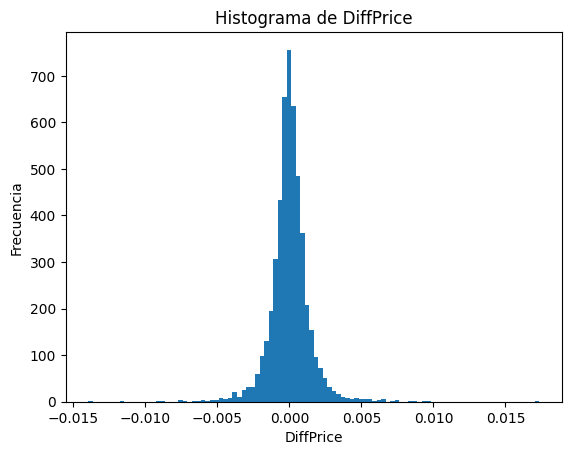

In [8]:
plt.hist(cierre['DiffPrice'],bins=100)
plt.xlabel('DiffPrice')
plt.ylabel('Frecuencia')
plt.title('Histograma de DiffPrice')
plt.show()

In [9]:
!pip install fitter

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 51.5 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
lognorm,106500.661168,3074.521081,3094.072060,inf,0.091597,5.996555e-37
beta,106676.111621,3161.233538,3187.301511,inf,0.090757,2.791805e-36
norm,106744.023571,3180.994184,3194.028170,inf,0.090533,4.194767e-36
burr,721804.561088,-597.805954,-571.737982,inf,0.386409,0.000000e+00
gamma,923360.482403,-376.348385,-356.797405,inf,0.591356,0.000000e+00


Mejor distribución (según el error cuadrático medio): {'lognorm': {'s': 0.009509964461157715, 'loc': -0.1471693008245066, 'scale': 0.14717494036949658}}
Parámetros de la distribución Beta: (14613.527947910232, 27360.991772190286, -0.20964563672636735, 0.6022017125608812)


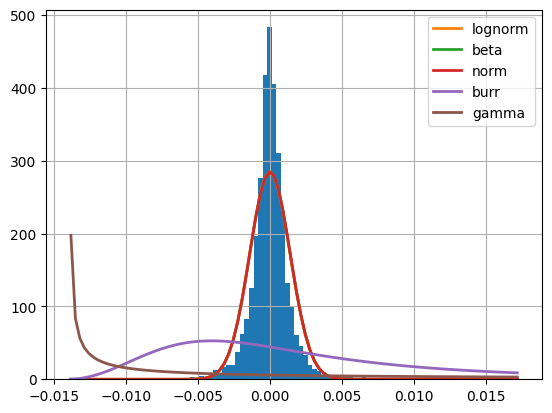

In [11]:
import pandas as pd
from fitter import Fitter

# Suponemos que ya tienes calculada la columna DiffPrice
# Aquí solo la mostramos como referencia
DiffPrice = cierre["DiffPrice"]

DiffPrice = DiffPrice.dropna() #Elimino el dato NaN de DiffPrice

# Ajustar las distribuciones a los datos de DiffPrice
f = Fitter(DiffPrice,
           distributions=['gamma', 'lognorm', 'beta', 'burr', 'norm'])  # Distribuciones a probar

# Ajustar las distribuciones
f.fit()

# Mostrar resumen de los resultados
display(f.summary())

# Identificar la mejor distribución según el error cuadrático medio
best_distribution = f.get_best(method='sumsquare_error')
print("Mejor distribución (según el error cuadrático medio):", best_distribution)

# Verificar si la distribución 'beta' está entre las ajustadas
if "beta" in f.fitted_param:
    beta_params = f.fitted_param["beta"]
    print("Parámetros de la distribución Beta:", beta_params)
else:
    print("La distribución 'beta' no se ajustó correctamente a los datos.")


In [14]:

from fitter import Fitter, get_common_distributions, get_distributions


f.get_best(method = 'sumsquare_error')
#Indentificamos parametros de la distrubicion lognorm
f.fitted_param["lognorm"]


(0.009509964461157715, -0.1471693008245066, 0.14717494036949658)

La mejor distribuccion que representa los datos es lognorm, con parametros:

(0.009509964461157715, -0.1471693008245066, 0.14717494036949658)


In [33]:
#7
df_2023=cierre.loc['2023']
#8
df_15d=cierre.groupby(pd.Grouper(level='time', freq='15D')).mean()
df_1w=cierre.groupby(pd.Grouper(level='time', freq='7D')).mean()
df_1m=cierre.groupby(pd.Grouper(level='time', freq='1M')).mean()




<ipython-input-33-a9102a58b6fe>:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_1m=cierre.groupby(pd.Grouper(level='time', freq='1M')).mean()


,Close,DiffPrice
time,,
2023-01-02 00:00:00,1.06796,-0.00200
2023-01-02 01:00:00,1.06965,0.00169
2023-01-02 02:00:00,1.07058,0.00093
2023-01-02 03:00:00,1.06896,-0.00162
2023-01-02 04:00:00,1.06880,-0.00016


<ipython-input-39-1f86bbedcece>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  for name, group in df_2023.groupby(pd.Grouper(level='time', freq='1M')):


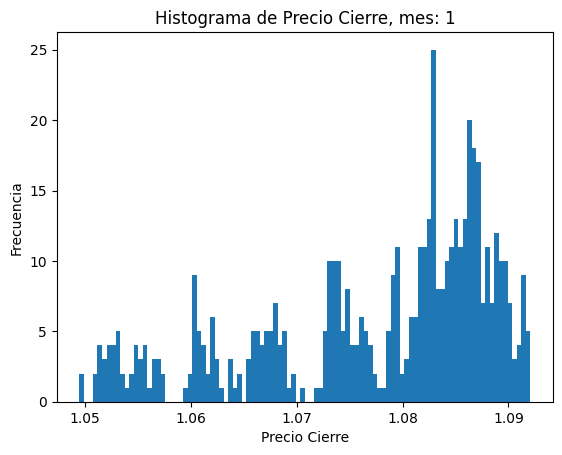

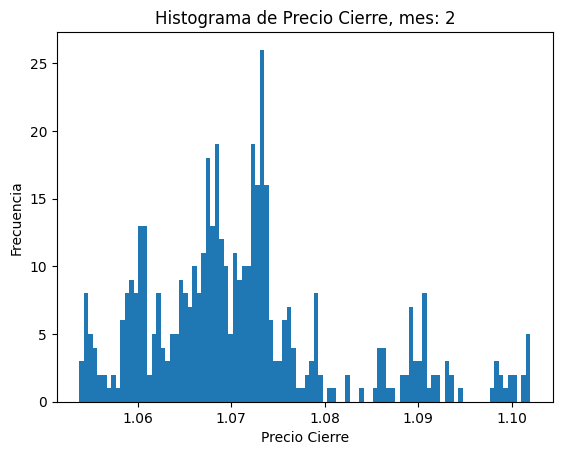

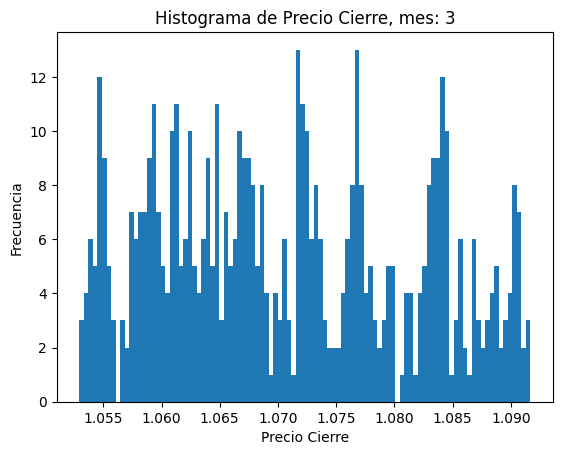

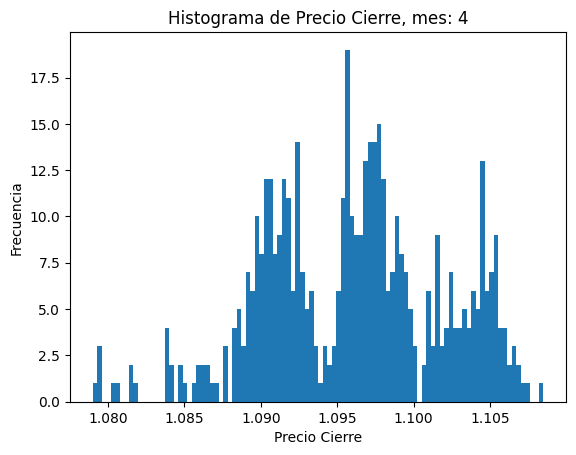

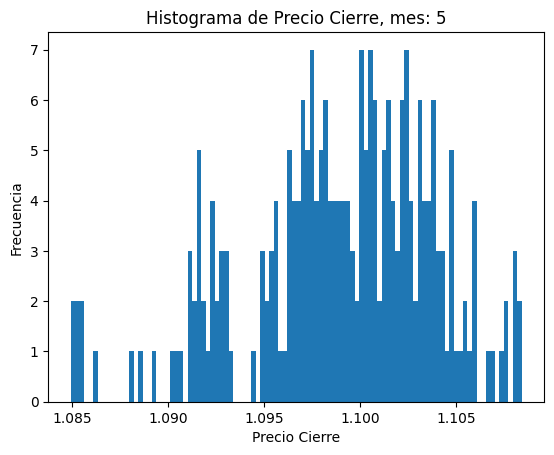

In [39]:
#9
i=1
for name, group in df_2023.groupby(pd.Grouper(level='time', freq='1M')):
  #print(name, group)
  plt.hist(group['Close'],bins=100)
  plt.xlabel('Precio Cierre')
  plt.ylabel('Frecuencia')
  plt.title(f'Histograma de Precio Cierre, mes: {i}')
  plt.show()
  i+=1

  print("\n")


Para el dataset realizar lo siguiente:

1. Leer los datos desde la página web

2. Renombrar las columnas en PascalCase
  Ejemplo: La columna radius_worst, concave points_se deberia llamar: RadiusWorst, ConcavePointsSe

3. Emplear los metodos head, tail, describe,info para obtener información acerca del dataframe,

4. Contabilizar la cantidad de null or nan en el dataframe, si hay null, ¿que valor se puede tomar para reemplazar los datos?

5. Encontrar los valores  diferentes en el target, mostrar que es B y M. Emplear el metodo unique.

6. Empleando la libreria seaborn y el metodo countplot, realice un conteo de las personas que tiene la etiqueta B y M.

  ```python
  import seaborn as sns
  sns.countplot?
  ```

7. Agregar una nueva columna llamada DiagnosisNumeric, en la que cada valor B, M se corresponde con un valor 0, 1 respectivamente.

8. Normalizar cada columna respecto a su media y desviación estandar: (x-mean(x))/std(x)

9. Realizar un promedio de todas las características similares, llamelas:

```python
['RadiusMean', 'TextureMean', 'PerimeterMean', 'AreaMean','SmoothnessMean', 'CompactnessMean', 'ConcavityMean','ConcavePointsMean',"SymetryMean","FractalDimensionMean"]
```

Para encontrar las características similares, radius1, radius2, radius3 y tomar los promedios puede emplear expresiones regulares como:

```python
re.match(r'^[a-zA-Z_]+', "holamundo12341").group(0)
```

con base a lo anterior forme los patrones a buscar, es decir:

```python
[Radius, Texture, Perimeter, ...]
```
 y con base en ello, emplee el metodo `startwith` para un string.  



10. En un mismo gráfico mostrar el histograma de la columna RadiusMean  para la etiqueta B y M en color naranja y azul de la columna Diagnosis respectivamente.

11. Para las columnas:
```python
['RadiusMean', 'TextureMean', 'PerimeterMean', 'AreaMean','SmoothnessMean', 'CompactnessMean', 'ConcavityMean','ConcavePointsMean',"symmetry3","fractal_dimension3"]```

realizar multiples histograma en un gráfico de [violin](https://seaborn.pydata.org/generated/seaborn.violinplot.html).

```python
data = pd.melt(df.iloc[:, 0:10], id_vars="Diagnosis",var_name="features",value_name="value")
sns.violinplot(x="features",y="value",  hue="Diagnosis",data=data, split=True, inner="quart")
plt.xticks(rotation=45)
```

10. Determinar los datos [outlier](https://en.wikipedia.org/wiki/Outlier)  para la columna RadiusMean y eliminarlos del data frame, para ello construya un gráfico tipo [boxplot](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html)


```
df.boxplot(column="RadiusMean", by='Diagnosis', sym = 'k.', figsize=(18,6))
```

¿Qué informacion podemos obtener de este tipo de gráficos?


Usar el rango intercuartílico (IQR): El IQR es la diferencia entre el tercer y el primer cuartil de los datos, es decir, el 75% y el 25% de los valores ordenados. Los valores que están fuera del rango [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR] se consideran outliers y se pueden eliminar o reemplazar. Por ejemplo, si queremos eliminar los outliers de una columna llamada 'edad' usando el IQR, podemos hacer lo siguiente

```python
Q1 = df['edad'].quantile(0.25)
Q3 = df['edad'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['edad'] < (Q1 - 1.5 * IQR)) | (df['edad'] > (Q3 + 1.5 * IQR)))]
```

Otra forma de determinar los outlier es con el puntaje Z:
El puntaje Z es el número de desviaciones estándar que un valor está por encima o por debajo de la media. Los valores que tienen un puntaje Z mayor que un umbral (por ejemplo, 3) se consideran outliers y se pueden eliminar o reemplazar. Por ejemplo, si queremos eliminar los outliers de la columna 'edad' usando el puntaje Z, podemos hacer lo siguiente:

```python
df = df[(np.abs(stats.zscore(df['edad'])) < 3)]
```

En un problema de machine learning se debe elegir todas las columnas y construir un algoritmo que permite obtener la mejor calidad de los datos sobre todas las columnas.


11. Encontrar la matrix de correlacion, emplear el metodo corr(), dentro de seaborn buscar el metodo heatmap() para realizar un grafico de la matrix de correlación.

12. ¿Que otro tipo de gráficos pueden ser realizados para entender mejor los datos?



In [40]:
!pip install ucimlrepo


In [80]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

# metadata
#print(breast_cancer_wisconsin_diagnostic.metadata)

# variable information
#print(breast_cancer_wisconsin_diagnostic.variables)


In [81]:
def to_pascal_case(col_name):
    return ''.join(word.capitalize() for word in col_name.replace('_', ' ').split())


X.columns = [to_pascal_case(col) for col in X.columns]

In [76]:
X.head()

,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,FractalDimension1,...,Radius3,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [52]:
X.tail()

,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,FractalDimension1,...,Radius3,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [53]:
X.describe()

,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,FractalDimension1,...,Radius3,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [54]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Radius1            569 non-null    float64
 1   Texture1           569 non-null    float64
 2   Perimeter1         569 non-null    float64
 3   Area1              569 non-null    float64
 4   Smoothness1        569 non-null    float64
 5   Compactness1       569 non-null    float64
 6   Concavity1         569 non-null    float64
 7   ConcavePoints1     569 non-null    float64
 8   Symmetry1          569 non-null    float64
 9   FractalDimension1  569 non-null    float64
 10  Radius2            569 non-null    float64
 11  Texture2           569 non-null    float64
 12  Perimeter2         569 non-null    float64
 13  Area2              569 non-null    float64
 14  Smoothness2        569 non-null    float64
 15  Compactness2       569 non-null    float64
 16  Concavity2         569 non

In [58]:
X.isna().sum()

,0
Radius1,0
Texture1,0
Perimeter1,0
Area1,0
Smoothness1,0
Compactness1,0
Concavity1,0
ConcavePoints1,0
Symmetry1,0
FractalDimension1,0


In [61]:
#5

y.Diagnosis.unique()

array(['M', 'B'], dtype=object)

<Axes: xlabel='Diagnosis', ylabel='count'>

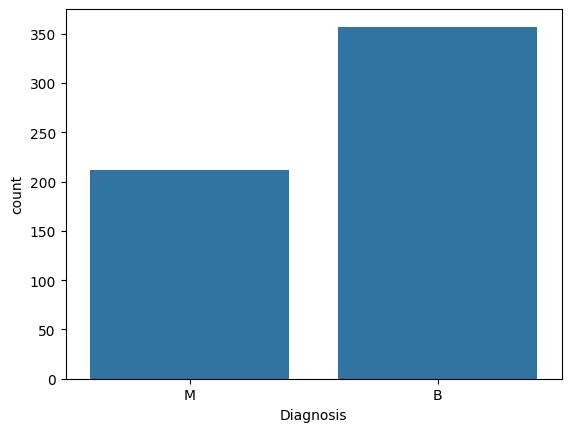

In [65]:
#6
import seaborn as sns
sns.countplot(x=y.Diagnosis)



In [77]:
#7
y['DiagnosisNumeric'] = y['Diagnosis'].map({'B': 0, 'M': 1})
y.head()

<ipython-input-77-3a509ee57794>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['DiagnosisNumeric'] = y['Diagnosis'].map({'B': 0, 'M': 1})


,Diagnosis,DiagnosisNumeric
0,M,1
1,M,1
2,M,1
3,M,1
4,M,1


In [89]:
#8
X_norm = (X - X.mean()) / X.std()
X_norm.head()

,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,FractalDimension1,...,Radius3,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3
0,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,2.253764,...,1.885031,-1.358098,2.301575,1.999478,1.306537,2.614365,2.107672,2.294058,2.748204,1.935312
1,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,-0.867889,...,1.804340,-0.368879,1.533776,1.888827,-0.375282,-0.430066,-0.146620,1.086129,-0.243675,0.280943
2,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,-0.397658,...,1.510541,-0.023953,1.346291,1.455004,0.526944,1.081980,0.854222,1.953282,1.151242,0.201214
3,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,4.906602,...,-0.281217,0.133866,-0.249720,-0.549538,3.391291,3.889975,1.987839,2.173873,6.040726,4.930672
4,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,-0.561956,...,1.297434,-1.465481,1.337363,1.219651,0.220362,-0.313119,0.612640,0.728618,-0.867590,-0.396751


In [90]:
import re


# Función para automatizar el proceso de encontrar columnas, calcular el promedio y eliminarlas
def process_columns(df, pattern):
    matching_columns = [col for col in df.columns if re.match(rf'^{pattern}', col)]
    df[f'{pattern}Mean'] = df[matching_columns].mean(axis=1)
    df.drop(columns=matching_columns, inplace=True)

# Lista de patrones a procesar
patterns = ['Radius', 'Texture', 'Perimeter', 'Area', 'Smoothness', 'Compactness', 'Concavity', 'ConcavePoints', 'Symmetry', 'FractalDimension']

for pattern in patterns:
    process_columns(X_norm, pattern)

X_norm.head()

,RadiusMean,TextureMean,PerimeterMean,AreaMean,SmoothnessMean,CompactnessMean,ConcavityMean,ConcavePointsMean,SymmetryMean,FractalDimensionMean
0,1.822892,-1.331460,2.133644,1.822793,0.886604,2.403566,1.827201,1.828182,2.037172,1.698454
1,1.377122,-0.532558,1.160448,1.512536,-0.602112,-0.536342,-0.203612,0.631241,-0.349009,-0.228767
2,1.438879,-0.115855,1.253866,1.397605,0.390527,0.982746,0.809797,1.804099,0.775643,0.032286
3,-0.241121,0.092354,-0.185181,-0.533818,2.453684,3.343920,1.573617,1.579444,4.544703,3.960995
4,1.438539,-1.135278,1.461481,1.411195,0.660750,0.059090,0.936729,1.099685,-0.412639,-0.153272


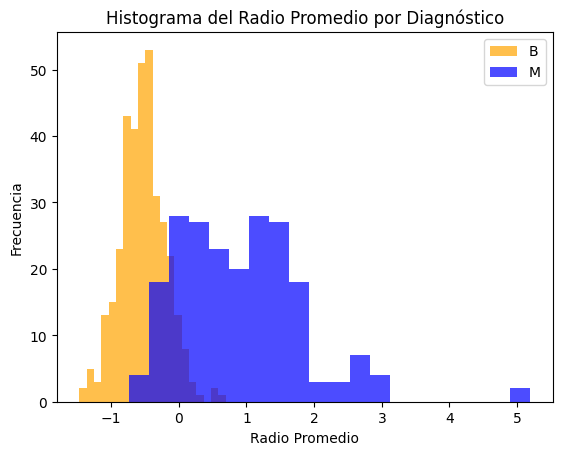

In [96]:
#10


benign = X_norm[y['Diagnosis'] == 'B']['RadiusMean']
malignant = X_norm[y['Diagnosis'] == 'M']['RadiusMean']

plt.hist(benign, bins=20, color='orange', alpha=0.7, label='B')
plt.hist(malignant, bins=20, color='blue', alpha=0.7, label='M')

plt.xlabel('Radio Promedio')
plt.ylabel('Frecuencia')
plt.title('Histograma del Radio Promedio por Diagnóstico')
plt.legend()

In [98]:
df_combined = pd.concat([X_norm, y], axis=1)

df_combined.rename(columns={y.columns[0]: 'Diagnosis'}, inplace=True)

df_mean = df_combined[['Diagnosis', 'RadiusMean', 'TextureMean', 'PerimeterMean', 'AreaMean',
                       'SmoothnessMean', 'CompactnessMean', 'ConcavityMean', 'ConcavePointsMean',
                       'SymmetryMean', 'FractalDimensionMean']]

data_melted = pd.melt(df_combined, id_vars='Diagnosis', var_name='features', value_name='value')

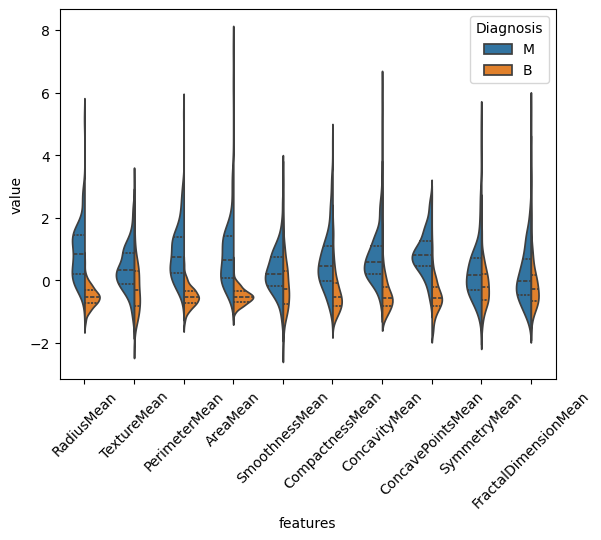

In [99]:
sns.violinplot(x="features", y="value", hue="Diagnosis", data=data_melted, split=True, inner="quart")


plt.xticks(rotation=45)

plt.show()